<a href="https://colab.research.google.com/github/cesarniyo/NLP-soon-coming/blob/master/Copy_of_ULMFiT_fastai_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP APPLICATION IN SENTIMENT CLASSIFICATION ( **Using Deep Learning**)






This project is organized into following parts:

-  Introduction
-  Exploration data analysis
-  Data visualization
-  Data Preprocessing and Preparation
-  Building Deep  Learning Model
-  Evaluating the Model
-  Conclusion



## Introduction



This project is about the application of Natural Language Processing for  Sentiment classification . Our dataset is made of  data collected from customer's Twitter  comments to the US Airlines expressing their satisfaction, non satisfaction or neutrality on offered services.  We will visualize the Reviews that people have put forward. And also based on their comment we will be building a Prediction Model using DIFFERENT deep learning models (ULMFiT)...................... whether they are happy or disappointed with the service. This models can be used for business purposes  to improve the quality of  services!







## Exploration data analysis

In [0]:
#Let's install PyTorch and fastai libraries first. Repeat this step every time you restart this notebook in colab.
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [2]:
# Also let us import needed libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
import seaborn as sns
from functools import partial
import io
import os

color = sns.color_palette()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot



import warnings
warnings.filterwarnings('ignore')


In [0]:
# Now let us load data
path = "/content/Tweets.csv"
df = pd.read_csv(path)


In [4]:
# At this point we can have a look on the dataset structure
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Checking on the shape of the dataset
df.shape

(14640, 15)

In [6]:
# Let us now see the data type in our dataset
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [7]:
# Following are  columns we have :
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
# count for each category of given comments:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Data visualization

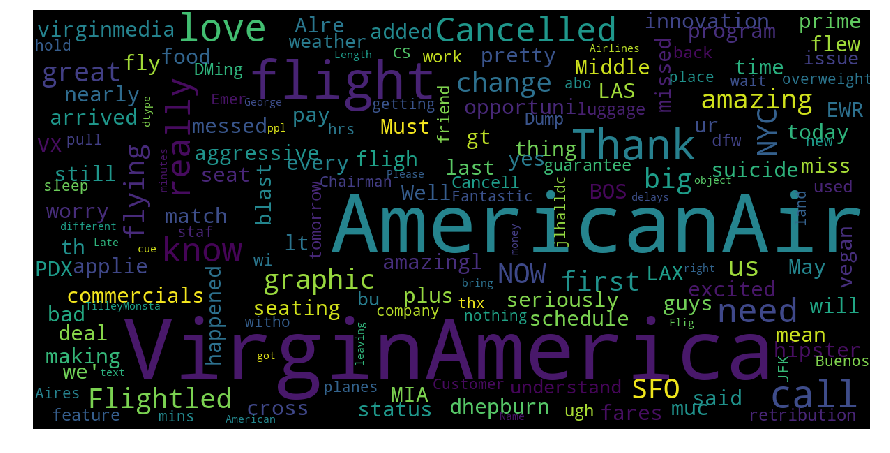

In [9]:
#Words that people have used the most in their reviews are desplayed below

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))
    

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['text'])#(df['reviews.text'])

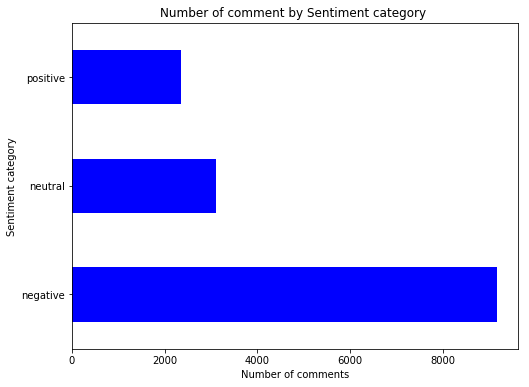

In [10]:
#Number of customers by category
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(8,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts()# find the counts for each unique category
        counts.plot.barh(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of comment by Sentiment category ') # Give the plot a main title
        ax.set_xlabel('Number of comments') # Set text for the x axis
        ax.set_ylabel('Sentiment category')# Set text for y axis
        #plt.tight_layout()
        plt.show()

plot_cols = ['airline_sentiment']
plot_bars(df, plot_cols)

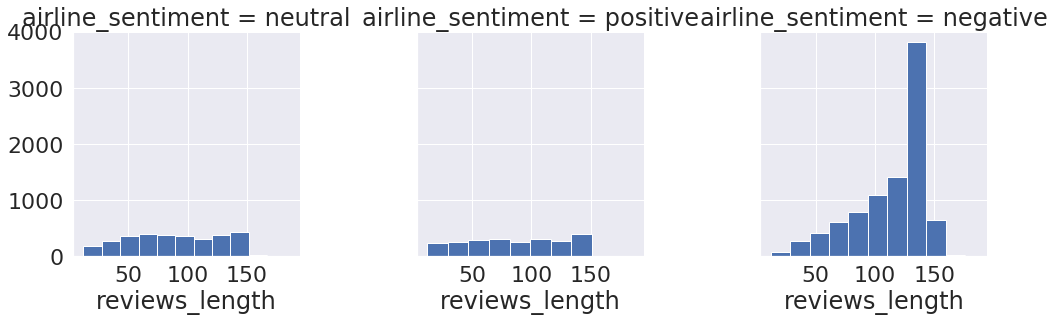

In [11]:


#Now let's have a look what do the length of the reviews tell about the ratings
df['reviews_length']=df['text'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(df,col='airline_sentiment',size=5)
g.map(plt.hist,'reviews_length')
plt.tight_layout()


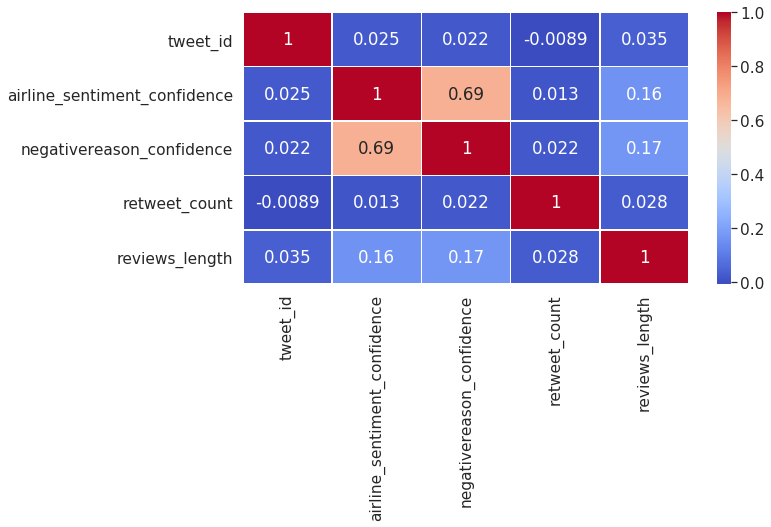

In [12]:

# Now lets plot the correlation map b

sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)


### Data  Preprocessing and Preparation

In [0]:


df.loc[df["airline_sentiment"]=='neutral',"airline_sentiment",]=0
df.loc[df["airline_sentiment"]=='positive',"airline_sentiment",]=1
df.loc[df["airline_sentiment"]=='negative',"airline_sentiment",]=2


all_text=df['text']
train_text=df['text']
y=df['airline_sentiment']


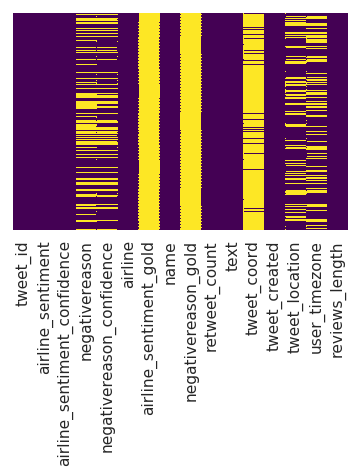

In [14]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],axis=1,inplace=True) 

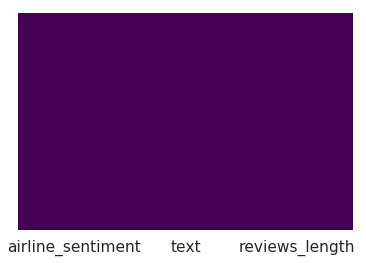

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [0]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

In [21]:
'''
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler # doctest: +NORMALIZE_WHITESPACE
from imblearn.under_sampling import ClusterCentroids # doctest: +NORMALIZE_WHITESPACE

  
#Down sampling
#cc = ClusterCentroids(random_state=42)
#X_res, y_res = cc.fit_resample(d2_train_dataset, training_Lebels)  
  
#Over sampling  
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df , df['airline_sentiment'])



print('Resampled dataset shape %s' % Counter(y_res))
#X_res=X_res.reshape((len(y_res), nx , ny))

print(len(X_res))
print(len(y_res))
print(X_res.shape)
print(y_res.shape)

#'''

"\nfrom collections import Counter\nfrom sklearn.datasets import make_classification\nfrom imblearn.over_sampling import RandomOverSampler # doctest: +NORMALIZE_WHITESPACE\nfrom imblearn.under_sampling import ClusterCentroids # doctest: +NORMALIZE_WHITESPACE\n\n  \n#Down sampling\n#cc = ClusterCentroids(random_state=42)\n#X_res, y_res = cc.fit_resample(d2_train_dataset, training_Lebels)  \n  \n#Over sampling  \nros = RandomOverSampler(random_state=42)\nX_res, y_res = ros.fit_resample(df , df['airline_sentiment'])\n\n\n\nprint('Resampled dataset shape %s' % Counter(y_res))\n#X_res=X_res.reshape((len(y_res), nx , ny))\n\nprint(len(X_res))\nprint(len(y_res))\nprint(X_res.shape)\nprint(y_res.shape)\n\n#"

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['airline_sentiment'], test_size = 0.4, random_state = 12)


In [23]:
df_trn.shape, df_val.shape

((8784, 3), (5856, 3))

## Building Deep Learning  Models

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)  #(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)


In [26]:
# train the learner object
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.950141,5.351124,0.151786,00:11
1,5.911043,5.010751,0.179112,00:11


In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


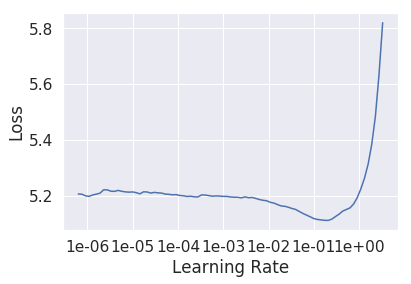

In [28]:
learn.recorder.plot()

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


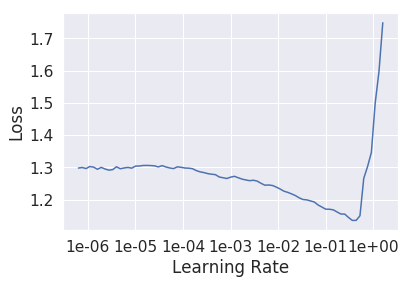

In [31]:
learn.lr_find()
learn.recorder.plot()

## Evaluating the Model1

In [32]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.833297,0.744372,0.683743,00:24


## Building model2

In [0]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)

word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)



char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=50000)

char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

#print(train_features)

In [0]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['text'],df['airline_sentiment'],test_size = 0.2)

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam 

Using TensorFlow backend.


In [36]:
MAX_NB_WORDS = 200#00

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12067 unique tokens.


In [37]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (11712, 200)
Shape of data test tensor: (2928, 200)


In [38]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(3, activation='softmax'))#sigmoid 1

W0725 14:32:40.762470 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:32:40.800158 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:32:40.809129 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 14:32:40.976174 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 14:32:40.997058 

In [39]:
model.compile(loss='sparse_categorical_crossentropy',#binary_crossentropy
              optimizer='adam',
              metrics=['accuracy'])

W0725 14:32:41.351595 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 14:32:41.386539 140713026185088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=5,
          validation_data=(x_test, test_y))

W0725 14:32:41.767627 140713026185088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 11712 samples, validate on 2928 samples
Epoch 1/5


## Conclusion

In [0]:
#https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

'''
Conclusion
In this challenge, several data mining techniques including; Exploration data analysis, Data visualization,Data preparation
were combined to building a number of Machine Learning Models. The models perfomences on training dataset were compared and 
Neural Network came up with top result 79%. Then after that I diceded to futher improve the NN model by applying the 
hyperparameter search with an intend to optimize the level of regularization,this stepped the final NN training perfomence 
to 80%.The NN model then deployed to new unseen dataset (test dataset) and the accuracy was 86%

'''